In [1]:
#import pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#improting dataset
train = pd.read_csv('./Dataset/tabular-playground-series-jan-2021/train.csv')
test = pd.read_csv('./Dataset/tabular-playground-series-jan-2021/test.csv')
sample_sub = pd.read_csv('./Dataset/tabular-playground-series-jan-2021/sample_submission.csv')

In [3]:
train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [4]:
test.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [5]:
sample_sub.head()

,id,target
0,0,0.5
1,2,0.5
2,6,0.5
3,7,0.5
4,10,0.5


In [6]:
#dropping id column from train and test dataset
train = train.drop(['id'],axis=1)
test = test.drop(['id'],axis=1)

In [7]:
train.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


<AxesSubplot:>

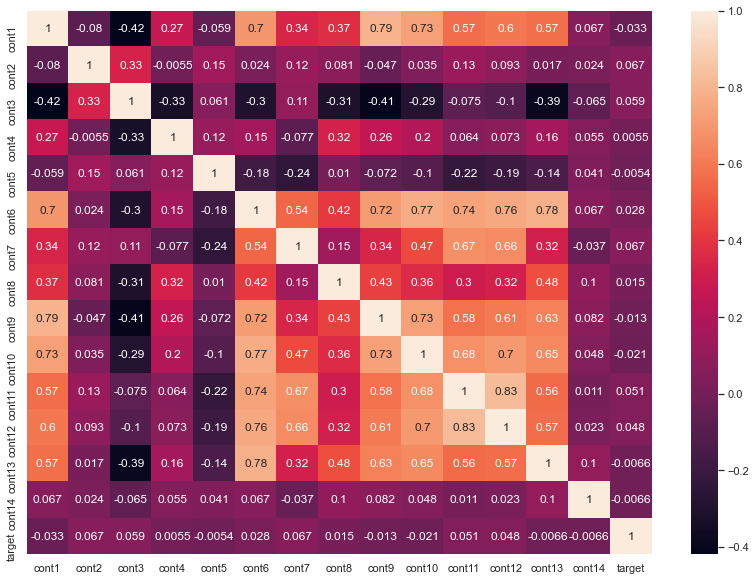

In [8]:
#correlation between features
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(train.corr(), annot=True)

In [9]:
#import packages for modelling
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [10]:
#splitting train features and target
X = train.drop(['target'],axis=1)
y = train['target']

In [12]:
#splitting to train and validation data
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                  y, 
                                                  test_size=0.2, 
                                                  shuffle=False)
#number of feature
n_features = X_train.shape[1]

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(240000, 14) (60000, 14) (240000,) (60000,)


In [13]:
#define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(n_features,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3840      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               2

In [14]:
#compile model
model.compile(optimizer='adam',
             loss='mae',
             metrics=['mean_squared_error'])

In [15]:
#callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=5)
callbacks = reduce_lr

In [16]:
#fit model
history = model.fit(X_train,
                   y_train,
                   validation_data=(X_val,y_val),
                   epochs=50,
                   callbacks=callbacks,
                   batch_size=500)

Epoch 1/50
480/480 [==============================] - 3s 5ms/step - loss: 2.5392 - mean_squared_error: 14.9661 - val_loss: 0.6242 - val_mean_squared_error: 0.5672 - lr: 0.0010
Epoch 2/50
480/480 [==============================] - 2s 5ms/step - loss: 0.6098 - mean_squared_error: 0.5449 - val_loss: 0.6073 - val_mean_squared_error: 0.5404 - lr: 0.0010
Epoch 3/50
480/480 [==============================] - 2s 5ms/step - loss: 0.6051 - mean_squared_error: 0.5353 - val_loss: 0.6097 - val_mean_squared_error: 0.5379 - lr: 0.0010
Epoch 4/50
480/480 [==============================] - 2s 5ms/step - loss: 0.6042 - mean_squared_error: 0.5340 - val_loss: 0.6047 - val_mean_squared_error: 0.5375 - lr: 0.0010
Epoch 5/50
480/480 [==============================] - 2s 5ms/step - loss: 0.6027 - mean_squared_error: 0.5312 - val_loss: 0.6048 - val_mean_squared_error: 0.5343 - lr: 0.0010
Epoch 6/50
480/480 [==============================] - 2s 5ms/step - loss: 0.6017 - mean_squared_error: 0.5296 - val_loss: 0.

480/480 [==============================] - 2s 5ms/step - loss: 0.5809 - mean_squared_error: 0.5034 - val_loss: 0.5931 - val_mean_squared_error: 0.5183 - lr: 6.2500e-05
Epoch 48/50
480/480 [==============================] - 2s 5ms/step - loss: 0.5809 - mean_squared_error: 0.5033 - val_loss: 0.5925 - val_mean_squared_error: 0.5158 - lr: 6.2500e-05
Epoch 49/50
480/480 [==============================] - 3s 6ms/step - loss: 0.5808 - mean_squared_error: 0.5031 - val_loss: 0.5928 - val_mean_squared_error: 0.5171 - lr: 6.2500e-05
Epoch 50/50
480/480 [==============================] - 2s 5ms/step - loss: 0.5807 - mean_squared_error: 0.5034 - val_loss: 0.5925 - val_mean_squared_error: 0.5168 - lr: 6.2500e-05


<Figure size 1008x720 with 0 Axes>

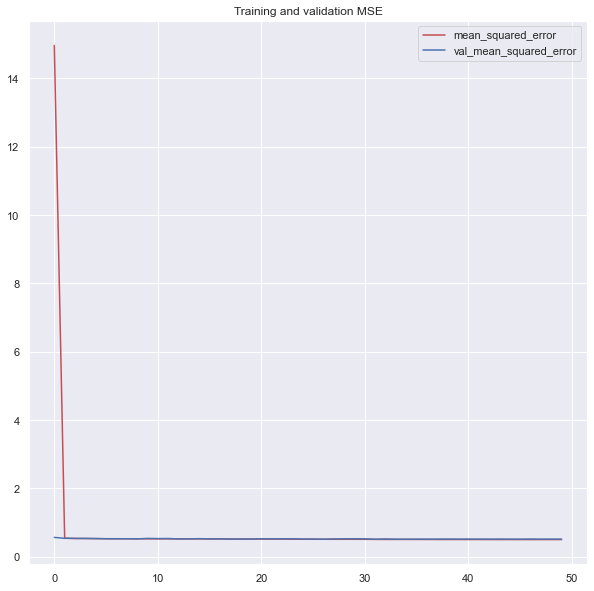

<Figure size 1008x720 with 0 Axes>

In [17]:
#training plot
mae = history.history['mean_squared_error']
val_mae = history.history['val_mean_squared_error']
epochs = range(len(mae))
plt.figure(figsize=(10,10))
plt.plot(epochs, mae, 'r', label='mean_squared_error')
plt.plot(epochs, val_mae, 'b', label='val_mean_squared_error')
plt.title('Training and validation MSE') 
plt.legend()
plt.figure()

<Figure size 1008x720 with 0 Axes>

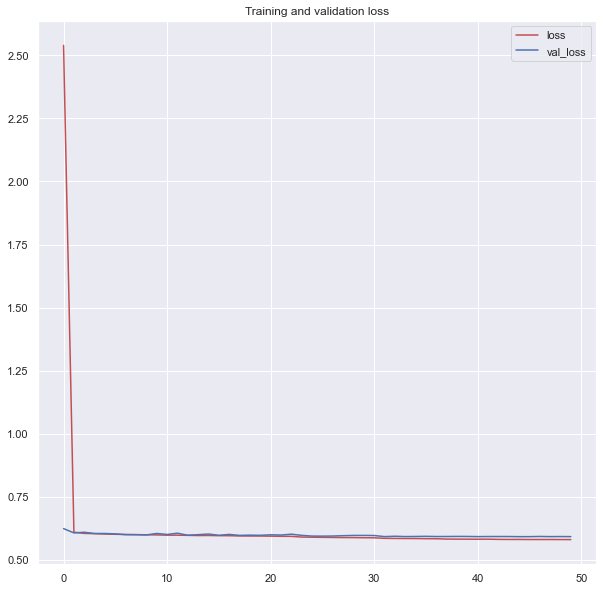

<Figure size 1008x720 with 0 Axes>

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(10,10))
plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('Training and validation loss') 
plt.legend()
plt.figure()

In [19]:
prediction = model.predict(test)

In [20]:
prediction

array([[8.294475 ],
       [7.9038005],
       [7.9942646],
       ...,
       [8.4904175],
       [8.202286 ],
       [7.777475 ]], dtype=float32)

In [21]:
test_original = pd.read_csv('./Dataset/tabular-playground-series-jan-2021/test.csv')
submission = pd.DataFrame(prediction, index=test_original.id, columns=['target'])
submission

,target
id,
0,8.294475
2,7.903800
6,7.994265
7,8.151200
10,8.324959
...,...
499984,8.202962
499985,7.886173
499987,8.490417


In [22]:
submission.to_csv('tabular_jan2021.csv')